In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [4]:
df_X = df_raw[[c for c in df.columns if c != 'vote']]

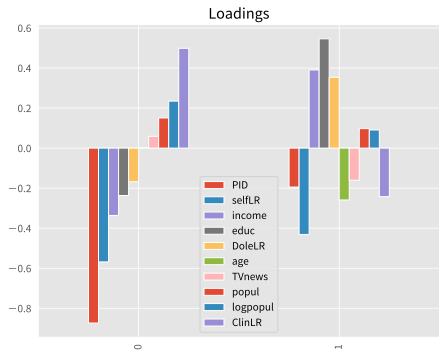

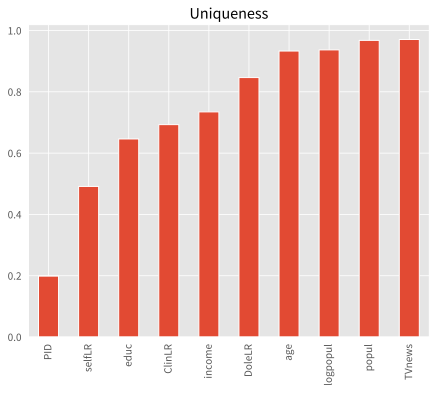

In [5]:
res = sm.Factor(df_X, n_factor=2).fit()

df = pd.DataFrame(res.loadings.T, columns=df_X.columns)
df = df.sort_values(axis=1, by=0)
df.plot.bar()
plt.title('Loadings')
plt.show()

s = pd.Series(res.uniqueness, index=df_X.columns)
s = s.sort_values()
s.plot.bar()
plt.title('Uniqueness')
plt.show()